##Neural Network using Genetic Algorithm

**Q. Build and Train a neural network using Genetic Algorithm to realise the
 functionality of XOR gate.**

In [19]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We have to first install the pygad module of python for this problem. It allows us to use genetic algorithms along with python

In [20]:
import numpy
from random import randint
import pygad
import pygad.nn
import pygad.gann

In [21]:
data_inputs = [[randint(0,1),randint(0,1)] for i in range(10)]
data_outputs = [x[0]^x[1] for x in data_inputs]
data_inputs = numpy.array(data_inputs)
data_outputs = numpy.array(data_outputs)

We are randomly selecting 10 members for our initial population, as asked in the problem statement

Then, using this population, we get the output value by performing xor on the randomly chosen 2 inputs

In [22]:
def fitness_func(solution, solution_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100
    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Generation = {}".format(ga_instance.generations_completed))
    print("Accuracy   = {}\n".format(ga_instance.best_solution()[1]))

The fitness function takes the value of data_inputs and data_outputs and calculates the fitness

Call back generation helps us get the generation and the accuracy. It also updates the population based on fitness values

In [23]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2,2],
                                num_neurons_output=2,
                                hidden_activations=["relu","relu"],
                                output_activation="softmax")

We are considering the following:

1. The input layer having 2 nodes and output layer having 2 nodes
2. Using 2 hidden layers with 2 nodes in each layer
3. Using Relu at both hidden layers
4. Softmax at the output

In [24]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=5, 
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation,
                       crossover_type = "two_points",
                       mutation_type = "swap"
                      )

The parameters used in this are:
1. Number of generations is 50
2. Number of parents in crossovers = 5
3. Mutation percentage is 5%
4. Crossover type is Two Point Crossover
5. Mutaton type is Swap Mutation

Generation = 1
Accuracy   = 90.0

Generation = 2
Accuracy   = 90.0

Generation = 3
Accuracy   = 90.0

Generation = 4
Accuracy   = 90.0

Generation = 5
Accuracy   = 90.0

Generation = 6
Accuracy   = 90.0

Generation = 7
Accuracy   = 90.0

Generation = 8
Accuracy   = 90.0

Generation = 9
Accuracy   = 90.0

Generation = 10
Accuracy   = 90.0

Generation = 11
Accuracy   = 90.0

Generation = 12
Accuracy   = 90.0

Generation = 13
Accuracy   = 90.0

Generation = 14
Accuracy   = 90.0

Generation = 15
Accuracy   = 90.0

Generation = 16
Accuracy   = 90.0

Generation = 17
Accuracy   = 100.0

Generation = 18
Accuracy   = 100.0

Generation = 19
Accuracy   = 100.0

Generation = 20
Accuracy   = 100.0

Generation = 21
Accuracy   = 100.0

Generation = 22
Accuracy   = 100.0

Generation = 23
Accuracy   = 100.0

Generation = 24
Accuracy   = 100.0

Generation = 25
Accuracy   = 100.0

Generation = 26
Accuracy   = 100.0

Generation = 27
Accuracy   = 100.0

Generation = 28
Accuracy   = 100.0

Generation = 29
A

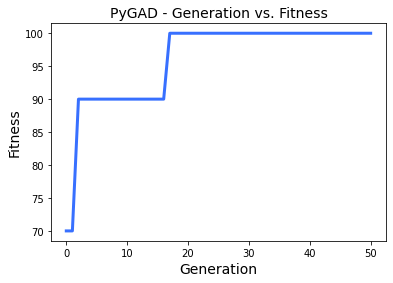

[-0.05801458  0.03705329  0.03434297 -0.04346552 -0.04546201  0.02049263
 -0.05801458  0.03705329  0.03434297 -0.04346552 -0.04546201 -0.03491127]
100.0
0


In [25]:
ga_instance.run()

ga_instance.plot_result()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

This generates the accuracy information for 50 generations

The plot generated shows Generation vs Fitness graph

In [26]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="softmax")

Now, testing for 1 hidden layer with 2 nodes

Generation = 1
Accuracy   = 100.0

Generation = 2
Accuracy   = 100.0

Generation = 3
Accuracy   = 100.0

Generation = 4
Accuracy   = 100.0

Generation = 5
Accuracy   = 100.0

Generation = 6
Accuracy   = 100.0

Generation = 7
Accuracy   = 100.0

Generation = 8
Accuracy   = 100.0

Generation = 9
Accuracy   = 100.0

Generation = 10
Accuracy   = 100.0

Generation = 11
Accuracy   = 100.0

Generation = 12
Accuracy   = 100.0

Generation = 13
Accuracy   = 100.0

Generation = 14
Accuracy   = 100.0

Generation = 15
Accuracy   = 100.0

Generation = 16
Accuracy   = 100.0

Generation = 17
Accuracy   = 100.0

Generation = 18
Accuracy   = 100.0

Generation = 19
Accuracy   = 100.0

Generation = 20
Accuracy   = 100.0

Generation = 21
Accuracy   = 100.0

Generation = 22
Accuracy   = 100.0

Generation = 23
Accuracy   = 100.0

Generation = 24
Accuracy   = 100.0

Generation = 25
Accuracy   = 100.0

Generation = 26
Accuracy   = 100.0

Generation = 27
Accuracy   = 100.0

Generation = 28
Accuracy   = 100.0

G

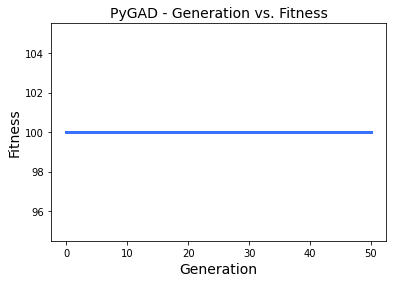

[-0.06314005  0.00775093  0.02902545 -0.05309226 -0.0449949   0.00775093
 -0.06354506 -0.05309226]
100.0
0


In [27]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=5, 
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation,
                       crossover_type = "two_points",
                       mutation_type = "swap"
                      )

ga_instance.run()

ga_instance.plot_result()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

Here, we obtain different values of accuracy for generations.